# OutlierDetection Using Z-score Technique

1.A z-score describes the position of a raw score in terms of its distance from the mean, when measured in standard deviation units. The z-score is positive if the value lies above the mean, and negative if it lies below the mean.


2.It is also known as a standard score, because it allows comparison of scores on different kinds of variables by standardizing the distribution.

3.The formula for calculating a z-score is is z = (x-μ)/σ, where x is the raw score, μ is the population mean, and σ is the population standard deviation.

4.Z-score technique can be appllied only on a column that is normally Distributed. ( https://www.simplypsychology.org/z-score.html )

5.In normal distribution most of the data points are present in the middle and few values are present on both side.

6.Note: Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness. ( https://www.scribbr.com/statistics/skewness )

**FORMULAS**
* **z-score** => z = (x-mean)/std
* **upper limit** => upper_limit = mean + 3*std
* **lower limit** => lower_limit = mean - 3*std

# The Empirical Rule


For all normal distributions, 68.2% of the observations will appear within plus or minus one standard deviation of the mean; 95.4% of the observations will fall within +/- two standard deviations; and 99.7% within +/- three standard deviations. This fact is sometimes referred to as the "empirical rule," a heuristic that describes where most of the data in a normal distribution will appear.

This means that data falling outside of +/- three standard deviations ("3-sigma") would signify rare occurrences(and treat as outliers).

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("dataset/placement.csv")
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [8]:
df.shape

(1000, 3)

In [10]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [9]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


**ploting the graphs**

C:\Users\CS-L2-PC09\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\CS-L2-PC09\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


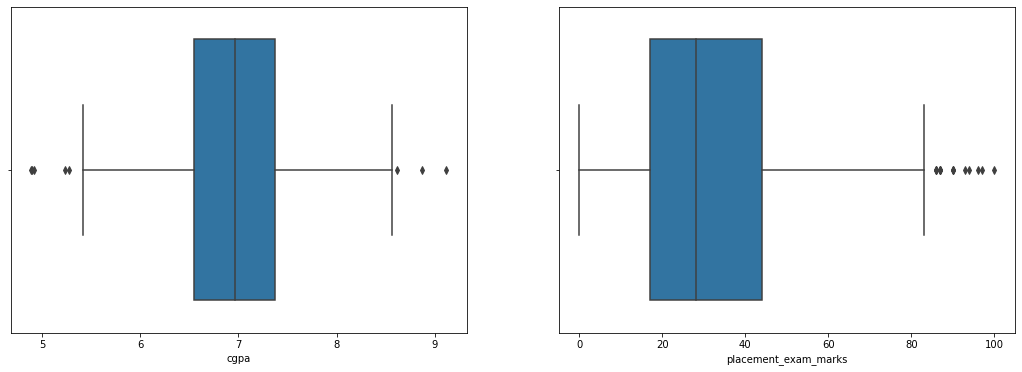

In [15]:
fig = plt.figure(figsize=(18,6))
df1 = plt.subplot(1,2,1)
sns.boxplot(df["cgpa"])

df2 = plt.subplot(1,2,2)
sns.boxplot(df["placement_exam_marks"])
plt.show()

C:\Users\CS-L2-PC09\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CS-L2-PC09\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


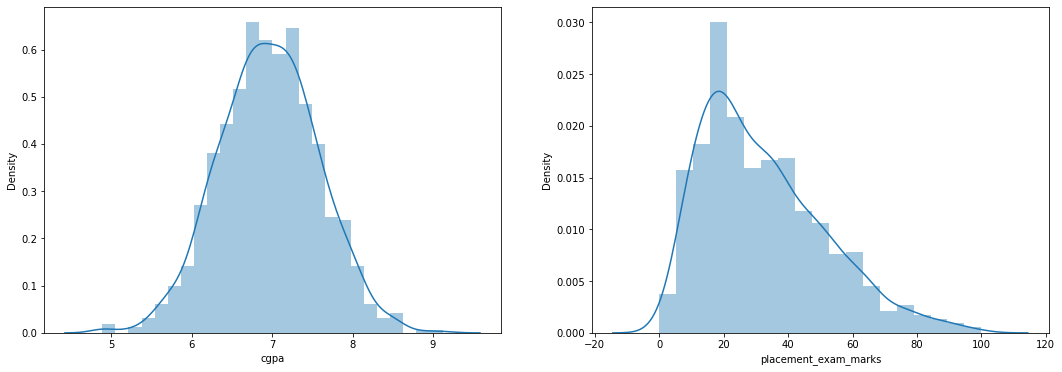

In [17]:
fig = plt.figure(figsize=(18,6))
df1 = plt.subplot(1,2,1)
sns.distplot(df["cgpa"])


df2 = plt.subplot(1,2,2)
sns.distplot(df["placement_exam_marks"])

plt.show()

In [18]:
df["cgpa"].skew()

-0.014529938929314918

In [19]:
df["placement_exam_marks"].skew()

0.8356419499466834

In [20]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124000000001
Std value of cgpa 0.6158978751323894
Min value of cgpa 4.89
Max value of cgpa 9.12


In [21]:
# Finding the boundary values
ub = df['cgpa'].mean() + 3*df['cgpa'].std()
lb = df['cgpa'].mean() - 3*df['cgpa'].std()
print("Highest allowed",ub)
print("Lowest allowed",lb)

Highest allowed 8.808933625397177
Lowest allowed 5.113546374602842


In [22]:
# Finding the outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# Trimming

In [23]:
# Trimming

new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


**z-score technic**

In [24]:
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [25]:
df.head()


,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [26]:
df[df['cgpa_zscore'] > 3]


,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [27]:
df[df['cgpa_zscore'] < -3]


,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [28]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]


,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [30]:
#Trimming 
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [31]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


# Capping


In [32]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [33]:
lower_limit


5.113546374602842

In [34]:
upper_limit

8.808933625397177

In [35]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [36]:
df['cgpa'].describe()


count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64